In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing #one_hot

%matplotlib inline
import seaborn as sns #数据可视化
sns.set_style('whitegrid')

In [2]:
import os

In [273]:
folder = 'TTNKdata'
_train_path=os.path.join(folder,'train.csv')
_test_path=os.path.join(folder,'test.csv')

In [274]:
train_data=pd.read_csv(_train_path)
test_data=pd.read_csv(_test_path)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
type(train_data.Age[5])
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_data.info()
print('-'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

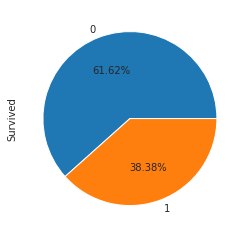

In [7]:
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')
#train_data['Survived'].value_counts() 计算0,1 个数
#pie(autopct = '%1.2f%%') 绘图及显示百分比

In [8]:
# 中间有部分信息丢失
# 一些机器学习算法能够处理缺失值，比如神经网络，一些则不能。对于缺失值，一般有以下几种处理方法：

# （1）如果数据集很多，但有很少的缺失值，可以删掉带缺失值的行；

# （2）如果该属性相对学习来说不是很重要，可以对缺失值赋均值或者众数。
# （3）对于标称属性，可以赋一个代表缺失的值，比如‘U0’。因为缺失本身也可能代表着一些隐含信息。比如船舱号Cabin这一属性，缺失可能代表并没有船舱。
# （4）使用回归 随机森林等模型来预测缺失属性的值。

In [9]:
train_data.Embarked[train_data.Embarked.isnull()]#isnull()显示缺失项

61     NaN
829    NaN
Name: Embarked, dtype: object

In [10]:
train_data.Embarked.dropna().mode().values#如果为多值另做处理

array(['S'], dtype=object)

In [11]:
df = pd.DataFrame({'A': [1, 2, 1, 2, 1, 2, 3]})
df.mode().values#众数

array([[1],
       [2]])

In [12]:
mode=train_data.Embarked.dropna().mode().values[0]
train_data.Embarked=train_data.Embarked.fillna(mode)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [14]:
# 将没有船舱作为一种属性
train_data['Cabin'] 
train_data.Cabin = train_data.Cabin.fillna('U0')#对空值填充

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
#预测age
#本来应该使用决策树，随机森利之类的进行预测的

In [17]:
#简单使用不同性别的均值
x,y = train_data.Age.dropna().values,train_data.Sex[train_data.Age.notnull()].values

In [18]:
y = np.where(y == 'male',1,0)#三目替换

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

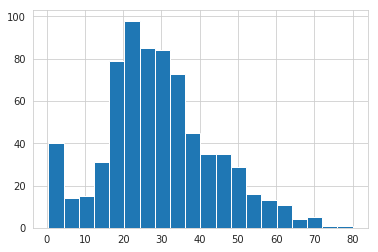

In [19]:
#总体的年龄分布.
plt.hist(x,bins=20)
#plt.hist(titanic.Age, # 绘图数据bins = 20, # 指定直方图的条形数为20个color = 'steelblue', # 指定填充色edgecolor = 'k', # 指定直方图的边界色label = '直方图') # 为直方图呈现标签

In [20]:
local=train_data.Sex[train_data.Sex=='male']

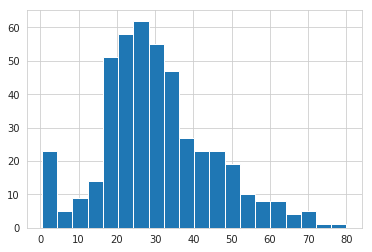

In [21]:
male_age = train_data.Age[train_data.Sex=='male'].dropna().values
local=plt.hist(male_age,bins=20)

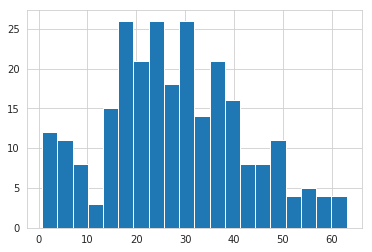

In [22]:
female_age = train_data.Age[train_data.Sex=='female'].dropna().values
local=plt.hist(female_age,bins=20)

In [23]:
male_miss_age_num = len(train_data.Age[train_data.Age.isnull()][train_data.Sex=='male'])
male_age.mean(),male_age.var() 

(30.72664459161148, 214.9739732886959)

In [24]:
fillage = np.random.normal(male_age.mean(),male_age.std(),male_miss_age_num)
index = train_data.Age[train_data.Age.isnull()][train_data.Sex=='male'].index
miss_dic = dict(zip(index,fillage))
#print(miss_dic)

In [25]:
train_data.Age.fillna(miss_dic,inplace=True)#男性年龄补全

In [26]:
female_miss_age_num = len(train_data.Age[train_data.Age.isnull()][train_data.Sex=='female'])
fillage2 = np.random.normal(female_age.mean(),female_age.std(),female_miss_age_num)
index = train_data.Age[train_data.Age.isnull()][train_data.Sex=='female'].index
miss_dic2 = dict(zip(index,fillage2))
train_data.Age.fillna(miss_dic2,inplace=True)#女性年龄补全

In [27]:
# male_age.mean(),male_age.var() 
# male_age.std()
# np.sqrt(male_age.var())##获取方差的两种方式

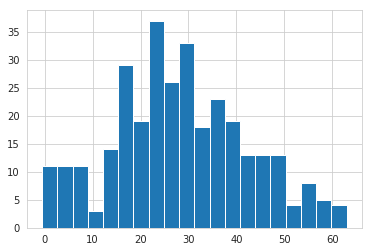

In [28]:
female_age = train_data.Age[train_data.Sex=='female'].dropna().values
local=plt.hist(female_age,bins=20)#补全之后的女性年龄统计

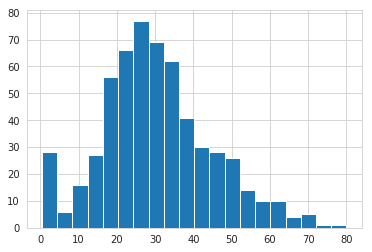

In [29]:
male_age = train_data.Age[train_data.Sex=='male'].dropna().values
local=plt.hist(male_age,bins=20)#男性补全

In [30]:
train_data.info()#补完数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [31]:
train_data.Sex.replace({'male':1,'female':0},inplace = True)#数值化

In [32]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U0,S


In [33]:
#分析数据关系
#1. 性别与生存的关系
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: Survived, dtype: int64

In [34]:
#对于没有序数关系的属性，可以使用onehot编码，防止引入序关系

In [35]:
train_data.Cabin.values[27]

'C23 C25 C27'

In [36]:
#获得船舱信息
cabin = []
code_l = []
for x in train_data.Cabin.values:
    cabin.append(x[0])
    if not x[0] in code_l:
        code_l.append(x[0])
print(code_l)
cabin

['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']


['U',
 'C',
 'U',
 'C',
 'U',
 'U',
 'E',
 'U',
 'U',
 'U',
 'G',
 'C',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'A',
 'U',
 'U',
 'U',
 'C',
 'U',
 'U',
 'U',
 'B',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'B',
 'C',
 'U',
 'U',
 'U',
 'U',
 'U',
 'B',
 'C',
 'U',
 'U',
 'U',
 'F',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'F',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'C',
 'U',
 'U',
 'U',
 'E',
 'U',
 'U',
 'U',
 'A',
 'D',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'C',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'B',
 'U',
 'U',
 'U',
 'U',
 'E',
 'D',
 'U',
 'U',
 'U',
 'F',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'C',
 'U',
 'B',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'F',
 'U',
 'U',
 'C',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'E'

In [37]:
code_l.sort()
code_dic={}
for x in range(len(code_l)):
    code_dic[code_l[x]]=x+1
print(code_dic)
cabin_new = [[x,code_dic[x[0]]] for x in cabin]
print(cabin_new)

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8, 'U': 9}
[['U', 9], ['C', 3], ['U', 9], ['C', 3], ['U', 9], ['U', 9], ['E', 5], ['U', 9], ['U', 9], ['U', 9], ['G', 7], ['C', 3], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['D', 4], ['U', 9], ['A', 1], ['U', 9], ['U', 9], ['U', 9], ['C', 3], ['U', 9], ['U', 9], ['U', 9], ['B', 2], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['D', 4], ['U', 9], ['B', 2], ['C', 3], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['B', 2], ['C', 3], ['U', 9], ['U', 9], ['U', 9], ['F', 6], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['F', 6], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['U', 9], ['C', 3], ['U', 9], ['U', 9], ['U', 9], ['E', 

In [38]:
new_code_l = [[code_l[x],x+1]for x in range(len(code_l))]
enc = preprocessing.OneHotEncoder()
roomtype = enc.fit(new_code_l)#onehot 
#roomtype=roomtype[:][:int(len(roomtype[0])/2)]
new_rooms_onehot = roomtype.transform(cabin_new).toarray()
print(new_rooms_onehot[0])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [39]:
rooms_onehot = np.array([x[:9] for x in new_rooms_onehot])
rooms_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [40]:
#这里数据还有问题，存在只有字母，没有数字的房间，使用0补充

In [90]:
import re
regular_ex=r'[0-9]+'#匹配一个到多个数字
pa = re.compile(regular_ex)
rooms_num = []
for text in train_data.Cabin:
    room_id = pa.findall(text)
    if(len(room_id)==0):
        room_id=['0']
    rooms_num.append([int(room_id[0])])
print(rooms_num)#房间号码只去第一个房间的

[[0], [85], [0], [123], [0], [0], [46], [0], [0], [0], [6], [103], [0], [0], [0], [0], [0], [0], [0], [0], [0], [56], [0], [6], [0], [0], [0], [23], [0], [0], [0], [78], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [33], [0], [30], [52], [0], [0], [0], [0], [0], [28], [83], [0], [0], [0], [33], [0], [0], [0], [0], [0], [0], [0], [0], [73], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [23], [0], [0], [0], [31], [0], [0], [0], [5], [10], [0], [0], [0], [0], [26], [0], [0], [0], [0], [0], [0], [0], [110], [0], [0], [0], [0], [0], [0], [0], [58], [0], [0], [0], [0], [101], [26], [0], [0], [0], [69], [0], [0], [0], [0], [0], [0], [0], [47], [123], [0], [86], [0], [0], [0], [0], [0], [0], [0], [0], [2], [0], [0], [2], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [33], [0], [0], [0], [19], [0], [0], [0], [7], [0], [0], [49], [0], [0], [0], [0], [0], [4], [0], [32], [0], [0], [0], [0], [0], [0], [0],

In [43]:
#对姓名称呼进行处理
train_data.Name[1]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [44]:
name_re = r'[A-Z][a-z]+\.'#称呼
calls = ['Mr.','Mrs.','Miss.','Master.','Dr.','Major.','Ms.']
new_calls=calls
name_pa  = re.compile(name_re)
for name in train_data.Name:
    if not name_pa.findall(name)[0] in calls:
        print(name_pa.findall(name))
        print(name)
        new_calls.append(name_pa.findall(name)[0])
#除了常见的还有很多，爵位，外国等|
# 'Rev.'牧师

['Don.']
Uruchurtu, Don. Manuel E
['Rev.']
Byles, Rev. Thomas Roussel Davids
['Mme.']
Aubart, Mme. Leontine Pauline
['Lady.']
Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")
['Sir.']
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")
['Mlle.']
Sagesser, Mlle. Emma
['Col.']
Simonius-Blumer, Col. Oberst Alfons
['Capt.']
Crosby, Capt. Edward Gifford
['Countess.']
Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)
['Jonkheer.']
Reuchlin, Jonkheer. John George


In [45]:
name_re = r'[A-Z][a-z]+\.'#称呼
name_pa  = re.compile(name_re)
calls_in_index=[]
for name in train_data.Name:
    calls_in_index.append(name_pa.findall(name)[0])
calls_in_index

['Mr.',
 'Mrs.',
 'Miss.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Master.',
 'Mrs.',
 'Mrs.',
 'Miss.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mrs.',
 'Master.',
 'Mr.',
 'Mrs.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Miss.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Don.',
 'Mrs.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Miss.',
 'Mrs.',
 'Mrs.',
 'Mr.',
 'Miss.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mrs.',
 'Master.',
 'Mr.',
 'Mrs.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Miss.',
 'Master.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Master.',
 'Mr.',
 'Master.',
 'Mrs.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Master.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Miss.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mrs.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Miss.',
 'Mr.'

In [46]:
new_calls

['Mr.',
 'Mrs.',
 'Miss.',
 'Master.',
 'Dr.',
 'Major.',
 'Ms.',
 'Don.',
 'Rev.',
 'Mme.',
 'Lady.',
 'Sir.',
 'Mlle.',
 'Col.',
 'Capt.',
 'Countess.',
 'Jonkheer.']

In [241]:
def one_hot(type_list,data):#two_list
    type_dic = {}
    data_to_trans=[]
    most = most_appeared(data)#处理没有见过的type
    for x in range(len(type_list)):
        type_dic[type_list[x]] = x+1
    for x in data:
        try:
            data_to_trans.append([x,type_dic[x]])
        except KeyError:
            print(x)
            data_to_trans.append([most,type_dic[most]])
    enc = preprocessing.OneHotEncoder()
    X = [[t,n+1]for t,n in zip(type_list,range(len(type_list)))]
    print(X)
    enc.fit(X)
    data_onehot = enc.transform(data_to_trans).toarray()#onehot 
    data_to_return = np.array([x[:len(type_list)] for x in data_onehot])
    print(data_to_return[0])
    return data_to_return

In [242]:
def most_appeared(a_list):
    type_dic = {}
    for x in a_list:
        if not x in type_dic.keys():
            print(x)
            type_dic[x]=0
        type_dic[x]+=1
    print(type_dic)
    max_v,max_k = 0,a_list[0]
    for k in type_dic:
        print(k)
        if type_dic[k]>max_v:
            max_v = type_dic[k]
            max_k = k
    return max_k

In [48]:
name_onehot = one_hot(new_calls,calls_in_index)
name_onehot

[['Mr.', 1], ['Mrs.', 2], ['Miss.', 3], ['Master.', 4], ['Dr.', 5], ['Major.', 6], ['Ms.', 7], ['Don.', 8], ['Rev.', 9], ['Mme.', 10], ['Lady.', 11], ['Sir.', 12], ['Mlle.', 13], ['Col.', 14], ['Capt.', 15], ['Countess.', 16], ['Jonkheer.', 17]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U0,S


In [54]:
import copy

In [121]:
prepressed_train_data = copy.deepcopy(train_data)#使用值传递
prepressed_train_data.pop('Ticket')
prepressed_train_data.pop('Name')
prepressed_train_data.pop('Cabin')
prepressed_train_data.pop('Embarked')
is_survived = prepressed_train_data.pop('Survived').tolist()
prepressed_train_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500


In [115]:
np_train_data = np.array(prepressed_train_data)
np_train_data[0]

array([ 1.  ,  3.  ,  1.  , 22.  ,  1.  ,  0.  ,  7.25])

In [109]:
name_onehot[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [110]:
rooms_onehot[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [92]:
rooms_num[1]

[85]

In [123]:
np_is_survived = [[x] for x in is_survived]

In [124]:
prepressed_train_data_to_save = np.concatenate((np_train_data,name_onehot,rooms_onehot,rooms_num,np_is_survived),axis=1)#拼接以上处理后的数据

In [125]:
print(prepressed_train_data_to_save.shape)
prepressed_train_data_to_save

(891, 35)


array([[  1.,   3.,   1., ...,   1.,   0.,   0.],
       [  2.,   1.,   0., ...,   0.,  85.,   1.],
       [  3.,   3.,   0., ...,   1.,   0.,   1.],
       ...,
       [889.,   3.,   0., ...,   1.,   0.,   0.],
       [890.,   1.,   1., ...,   0., 148.,   1.],
       [891.,   3.,   1., ...,   1.,   0.,   0.]])

In [126]:
folder = 'TTNKdata'
train_save_path = os.path.join(folder,'prepressed_train_data.csv')
pd.DataFrame()
data_to_save = pd.DataFrame(prepressed_train_data_to_save)
#index参数设置为False表示不保存行索引,header设置为False表示不保存列索引
data_to_save.to_csv(train_save_path,index=False,header=False) 

In [137]:
##接下来对测试数据进行相同处理
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [141]:
#补充Fare
mean = test_data.Fare[test_data.Fare.notnull()].mean()
test_data.Fare.fillna(mean,inplace = True)

In [142]:
test_data.Cabin = test_data.Cabin.fillna('U0')#对空值填充

In [177]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            393 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [171]:
#性别数值化
#test_data.Sex.replace({'male':1,'female':0},inplace = True)#数值化
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,U0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,U0,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,U0,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,U0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,U0,S


In [173]:
#补全男性女性年龄
male_age = test_data.Age[test_data.Sex==1].dropna().values
male_miss_age_num = len(test_data.Age[test_data.Age.isnull()][test_data.Sex==1])
print(male_age.mean(),male_age.var())
print(male_miss_age_num)

30.178442693141946 187.162390781843
0


In [174]:
fillage = np.random.normal(male_age.mean(),male_age.std(),male_miss_age_num)
index = test_data.Age[test_data.Age.isnull()][test_data.Sex==1].index
miss_dic = dict(zip(index,fillage))
print(miss_dic)

{}


In [175]:
test_data.Age.fillna(miss_dic,inplace=True)

In [180]:
female_age = test_data.Age[test_data.Sex==0].dropna().values
female_miss_age_num = len(test_data.Age[test_data.Age.isnull()][test_data.Sex==0])
print(female_age.mean(),female_age.var())
print(female_miss_age_num)
fillage = np.random.normal(female_age.mean(),female_age.std(),female_miss_age_num)
index = test_data.Age[test_data.Age.isnull()][test_data.Sex==0].index
miss_dic = dict(zip(index,fillage))
print(miss_dic)
test_data.Age.fillna(miss_dic,inplace=True)

30.27236220472441 236.16775032550066
25
{22: 40.596813438178586, 33: 13.005014883465556, 36: 19.460874397774475, 65: 6.104997646107702, 88: 24.27532377787343, 111: 27.749489777744284, 127: 44.7270671741059, 132: 32.76100762348102, 160: 27.95281020010657, 168: 34.32706711814595, 188: 27.600654126009182, 199: 32.33334965185153, 200: 50.2176609129495, 216: 18.144080312579796, 225: 2.0766504319512933, 227: 30.184489097322714, 249: -0.2178243219934224, 268: 24.753981220391086, 273: 17.42482366111332, 282: 29.07164231485214, 304: 46.83454052424277, 365: 31.35571645684056, 382: 31.77965246656497, 408: 23.858477228422615, 410: 34.177242787112704}


In [181]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [182]:
##数值化

In [184]:
#获得船舱信息
cabin = []
for x in test_data.Cabin.values:
    cabin.append(x[0])
cabin

['U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'B',
 'U',
 'E',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'B',
 'U',
 'B',
 'U',
 'A',
 'U',
 'U',
 'U',
 'U',
 'U',
 'C',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'D',
 'U',
 'A',
 'U',
 'D',
 'U',
 'C',
 'U',
 'U',
 'C',
 'U',
 'U',
 'U',
 'F',
 'U',
 'B',
 'U',
 'U',
 'U',
 'U',
 'B',
 'U',
 'U',
 'U',
 'C',
 'C',
 'U',
 'U',
 'U',
 'D',
 'C',
 'C',
 'U',
 'C',
 'U',
 'U',
 'U',
 'C',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'B',
 'U',
 'U',
 'U',
 'C',
 'U',
 'U',
 'U',
 'C',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'F',
 'U',
 'U',
 'A',
 'U',
 'C',
 'U',
 'U',
 'G',
 'C',
 'U',
 'U',
 'U',
 'C',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'C',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'B',
 'U',
 'U',
 'U',
 'E',
 'U',
 'U',
 'U',
 'C',
 'U',
 'U',
 'U',
 'U',
 'U',
 'C',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'B'

In [185]:
cabin_new = [[x,code_dic[x[0]]] for x in cabin]

In [187]:
new_code_l = [[code_l[x],x+1]for x in range(len(code_l))]
enc = preprocessing.OneHotEncoder()
roomtype = enc.fit(new_code_l)
new_rooms_onehot = roomtype.transform(cabin_new).toarray()
print(new_rooms_onehot[0])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [191]:
rooms_onehot = np.array([x[:9] for x in new_rooms_onehot])
len(rooms_onehot)

418

In [192]:
#房间号码：
regular_ex=r'[0-9]+'#匹配一个到多个数字
pa = re.compile(regular_ex)
rooms_num = []
for text in test_data.Cabin:
    room_id = pa.findall(text)
    if(len(room_id)==0):
        room_id=['0']
    rooms_num.append([int(room_id[0])])
print(rooms_num)#房间号码只去第一个房间的

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [45], [0], [31], [0], [0], [0], [0], [0], [0], [0], [0], [0], [57], [0], [36], [0], [21], [0], [0], [0], [0], [0], [78], [0], [0], [0], [0], [0], [0], [34], [0], [0], [19], [0], [9], [0], [15], [0], [31], [0], [0], [23], [0], [0], [0], [63], [0], [61], [0], [0], [0], [0], [57], [0], [0], [0], [53], [23], [0], [0], [0], [43], [130], [132], [0], [101], [0], [0], [0], [55], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [71], [0], [0], [0], [46], [0], [0], [0], [116], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [29], [0], [55], [0], [0], [6], [6], [0], [0], [0], [28], [0], [0], [0], [0], [0], [0], [0], [0], [51], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [57], [0], [0], [0], [46], [0], [0], [0], [54], [0], [0], [0], [0], [0], [97], [0], [22], [0], [0], [0], [0], [0], [0], [0], [10], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [116], [4], [45], [0], [52], [30], [0], [58], [0], [0], [0], [0], [0], [0], 

In [199]:
name_re = r'[A-Z][a-z]+\.'#称呼
calls = ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Dr.', 'Major.', 'Ms.', 'Don.', 'Rev.', 'Mme.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess.', 'Jonkheer.']
new_calls=calls

In [203]:
name_re = r'[A-Z][a-z]+\.'#称呼
name_pa  = re.compile(name_re)
calls_in_index=[]
for name in test_data.Name:
    calls_in_index.append(name_pa.findall(name)[0])
len(calls_in_index)

418

In [244]:
test_name_onehot = one_hot(new_calls,calls_in_index)
#KeyError: 'Dona.'没见过的称谓

Mr.
Mrs.
Miss.
Master.
Ms.
Col.
Rev.
Dr.
Dona.
{'Mr.': 240, 'Mrs.': 72, 'Miss.': 78, 'Master.': 21, 'Ms.': 1, 'Col.': 2, 'Rev.': 2, 'Dr.': 1, 'Dona.': 1}
Mr.
Mrs.
Miss.
Master.
Ms.
Col.
Rev.
Dr.
Dona.
Dona.
[['Mr.', 1], ['Mrs.', 2], ['Miss.', 3], ['Master.', 4], ['Dr.', 5], ['Major.', 6], ['Ms.', 7], ['Don.', 8], ['Rev.', 9], ['Mme.', 10], ['Lady.', 11], ['Sir.', 12], ['Mlle.', 13], ['Col.', 14], ['Capt.', 15], ['Countess.', 16], ['Jonkheer.', 17]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [247]:
len(test_name_onehot)

418

In [254]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,U0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,U0,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,U0,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,U0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,U0,S


In [259]:
prepressed_test_data = copy.deepcopy(test_data)#使用值传递
prepressed_test_data.pop('Ticket')
prepressed_test_data.pop('Name')
prepressed_test_data.pop('Cabin')
prepressed_test_data.pop('Embarked')
prepressed_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


In [261]:
np_test_data = np.array(prepressed_test_data)
np_test_data[0]

array([892.    ,   3.    ,   1.    ,  34.5   ,   0.    ,   0.    ,
         7.8292])

In [265]:
test_name_onehot.shape

(418, 17)

In [266]:
rooms_onehot.shape

(418, 9)

In [267]:
len(rooms_num)

418

In [268]:
prepressed_test_data_to_save = np.concatenate((np_test_data,test_name_onehot,rooms_onehot,rooms_num),axis=1)#拼接以上处理后的数据

In [269]:
print(prepressed_test_data_to_save.shape)
prepressed_test_data_to_save

(418, 34)


array([[8.920e+02, 3.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [8.930e+02, 3.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [8.940e+02, 2.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.307e+03, 3.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.308e+03, 3.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.309e+03, 3.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [270]:
folder = 'TTNKdata'
test_save_path = os.path.join(folder,'prepressed_test_data.csv')
pd.DataFrame()
data_to_save = pd.DataFrame(prepressed_test_data_to_save)
#index参数设置为False表示不保存行索引,header设置为False表示不保存列索引
data_to_save.to_csv(test_save_path,index=False,header=False) 